In [149]:
# Use k-means to find centroids of location data
from scipy import cluster

locations = [(1,1), (1.5,1.5), (1.2, 2.5), (2,3), 
             (4,4), (1,4), (3.2,3.7), (4.1, 3)]
k = 2

centroids, dist = cluster.vq.kmeans(locations, k)
print centroids
# [[ 1.34        2.4       ]
# [ 3.76666667  3.56666667]]

[[ 1.34        2.4       ]
 [ 3.76666667  3.56666667]]
0.848285142784


In [134]:
# Tutorial showing how to use k-means clustering
# Show scatter plots and k-means for k = {2, 3}
%matplotlib inline

import pdb
from matplotlib import pyplot as plt
import numpy as np

from scipy import cluster

locations = [(1,1), (1.5,1.5), (1.2, 2.5), (2,3), (4,4), (1,4), (3.2,3.7), (4.1, 3)]
x, y = zip(*locations)
ar = np.array(locations)

def plot_locations():
    plt.scatter(x, y)
    plt.ylim([0.5, 4.5])
    plt.xlim([-1, 5])
    plt.show()

def k_means_plot(k, circle_flag=False):
    codes, dist = cluster.vq.kmeans(ar, k)
    vecs, dist = cluster.vq.vq(ar, codes)
    for index, code in enumerate(codes):
        plt.scatter(*code, c='r', s=100, marker='x')
        if circle_flag:
            cluster_points = [p for (p, mask) in zip(ar, vecs) if mask==index]
            radius = max(np.linalg.norm(p-code) for p in cluster_points)
            circle = plt.Circle(code, radius, fill=False)
            plt.gca().add_patch(circle)
    plot_locations()

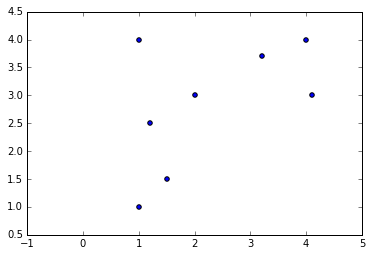

In [135]:
# Scatter plot of locations
plot_locations()

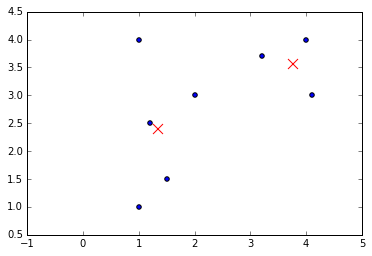

In [136]:
# K-means, k=2
k_means_plot(2)

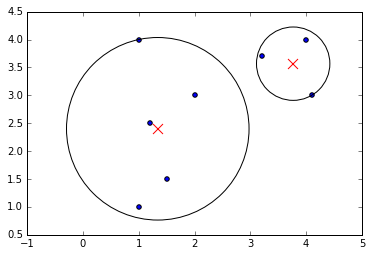

In [137]:
# K-means, k=2 with circles
k_means_plot(2, circle_flag=True)

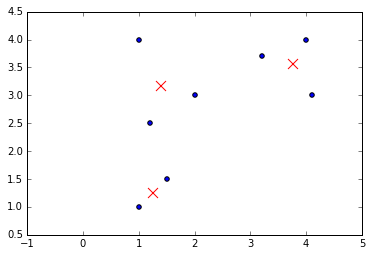

In [138]:
# K-means, k=3
k_means_plot(3)

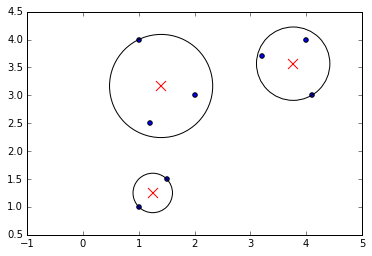

In [139]:
# K-means, k=3 with circles
k_means_plot(3, circle_flag=True)

In [168]:
# Return the most clustered colors of an image
# Use scipy's k-means clustering algorithm
from PIL import Image
from scipy import misc, product, cluster, histogram

print 'Reading image...'
image = 'image.jpeg'
im = Image.open(image)
ar = misc.fromimage(im)
shape = ar.shape
ar = ar.reshape(product(shape[:2]), shape[2])
ar = ar.astype(float) # required type for k-means

k = 5

print 'Finding clusters...'
centroids, dist = cluster.vq.kmeans(ar, k)
vecs, dist = cluster.vq.vq(ar, centroids)
counts, bins = histogram(vecs, len(centroids)) # count occurrences
sorted_index = sorted(range(len(counts)), key=lambda index: counts[index], reverse=True)

for index in sorted_index:
    peak = codes[index]
    peak = peak.astype(int)
    colour = ''.join(format(c, '02x') for c in peak)
    print 'Cluster #{} contains {} pixels'.format(colour, counts[index])

Reading image...
Finding clusters...
Cluster #5d8fb4 contains 17358 pixels
Cluster #18445d contains 9278 pixels
Cluster #206e86 contains 8801 pixels
Cluster #95c1e8 contains 8552 pixels
Cluster #506c4b contains 6571 pixels
